# Project: Investigate the features that may affect showing up for their appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I choose is Medical Appointment No Shows.(Original source on [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)) 110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.
I would focus on the features of people who show-up or no-show, and find the trend that will affect patient's decision.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
sns.set_style('darkgrid')
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [54]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling and Cleaning


### General Properties

In [55]:
df.shape

(110527, 14)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [57]:
df.duplicated().sum()

0

**Note**  
There is no duplicated or missing data in this dataset.

<a id='eda'></a>
## Exploratory Data Analysis

In [58]:
df.rename(columns = lambda x: x.lower(), inplace=True)

In [59]:
df.drop(['patientid','appointmentid'], axis=1, inplace=True)

In this data, we don't need the features to indentify each rows, so I decide to delete this two columns.

In [61]:
df.rename(columns ={'scheduledday':'scheduled_day', 'appointmentday':'appointment_day','no-show':'no_show'}, inplace=True)

**Note**  
For convenience, all columns are ajusted to lower case and with underscored. And then I drop the 'patientid' and 'appointmentid', because we just need to know what their attributes are, not who they are.

In [62]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
df_show = df[df['no_show']== 'No']

In [64]:
df_show.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
std,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [65]:
df_no_show = df[df['no_show']== 'Yes']

In [66]:
df_no_show.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [67]:
df_show.age.count(),df_no_show.age.count()

(88208, 22319)

**Note**  
And I seperate whole data into two group, show-up group and no-show group. In order to see what distribution these two group have. 

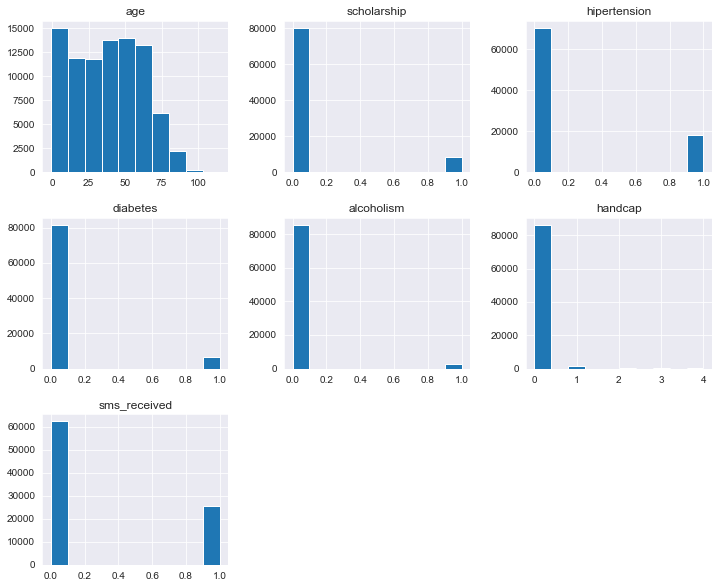

In [68]:
df_show.hist(figsize=(12,10));

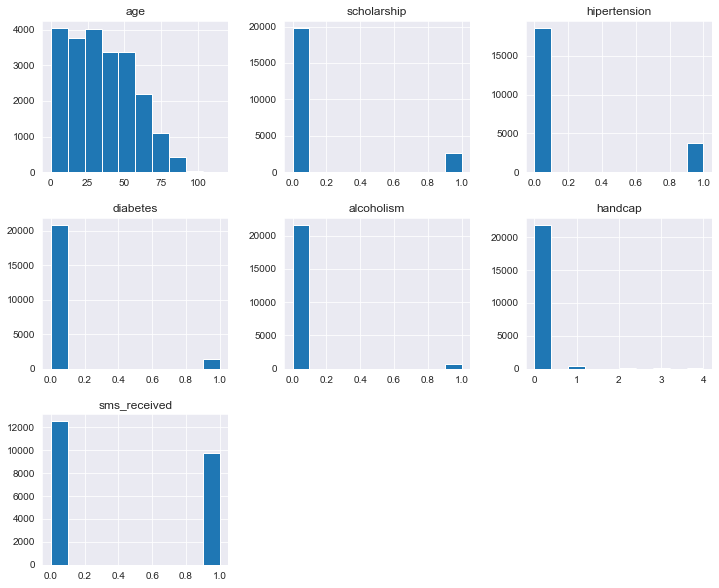

In [69]:
df_no_show.hist(figsize=(12,10));

In [70]:
df.drop(['alcoholism','handcap'], axis=1, inplace=True)

**Note**  
Accoring to the histograms and dataframe description, it looks like the mean value and distribution of alcoholism and handcap are quite similar, there are no significant difference. I decide to delete these two columns. 

In [71]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,No


### 1. Do SMS reminders really increase the attendance rate?

In [72]:
sms_counts = df.groupby(['sms_received','no_show']).age.count()
sms_counts

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: age, dtype: int64

In [73]:
no_sms_total = df.query('sms_received == 0').age.count()
no_sms_total

75045

In [74]:
no_sms = sms_counts[0] / no_sms_total
no_sms

no_show
No     0.832967
Yes    0.167033
Name: age, dtype: float64

In [75]:
sms_total = df.query('sms_received == 1').age.count()
sms_total

35482

In [76]:
sms = sms_counts[1] / sms_total
sms

no_show
No     0.724255
Yes    0.275745
Name: age, dtype: float64

In [77]:
df_sms = pd.DataFrame(sms)
df_no_sms = pd.DataFrame(no_sms)
df_sms = pd.concat([df_sms, df_no_sms], axis=1)
df_sms.columns =['received','not_received']
df_sms

,received,not_received
no_show,,
No,0.724255,0.832967
Yes,0.275745,0.167033


In [78]:
ind = np.arange(2)
width = 0.35

         received  not_received
no_show                        
No       0.724255      0.832967
Yes      0.275745      0.167033


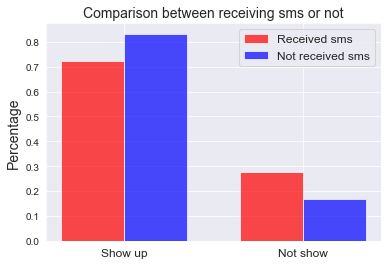

In [79]:
print(df_sms)
red_bars = plt.bar(ind, df_sms.received, width, color='r', alpha=.7, label='Received sms')
blue_bars = plt.bar(ind + width, df_sms.not_received, width, color='b', alpha=.7, label='Not received sms')

plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison between receiving sms or not', fontsize=14)
locations = ind + width / 2  
labels = ['Show up','Not show']
plt.xticks(locations, labels, fontsize =12)

plt.legend(fontsize=12);

### Figure 1
Red bars show the group 'Received sms'. 72.4% people show up and 27.6% people not show.   
Blue bars show the group 'Not received sms'. 83.3% people show up and 16.7% people not show. 

**Note**  
Group people into 'sms_received' and 'no_show' and divide the group by each 'sms_received' group. Now that I get the proportion of each group and put them into the same dataframe, so that I can make a plot.
According to this figure, we can observe that SMS do not increase attendance rate, even decrease.

### 2. Do the people who schedule in advance are more willing to show up?

In [80]:
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

In [81]:
gap = []
for x,y in zip(df.appointment_day, df.scheduled_day):
    if (x-y).days == -1:
        gap.append('0')
    elif (x-y).days == 0:
        gap.append('1')
    elif (x-y).days == 1:
        gap.append('2')
    elif (x-y).days == 2:
        gap.append('3')
    elif (x-y).days == 3:
        gap.append('4')
    elif (x-y).days == 4:
        gap.append('5')
    elif (x-y).days == 45:
        gap.append('6')
    else:
        gap.append('over a week')
df['days_between_two_date'] = gap 

**Note**  
Adjust the format of scheduled_day and appointment_day from string to datestamp, and calculate the days between two date.


In [82]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,sms_received,no_show,days_between_two_date
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,No,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,No,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,No,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,No,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,No,0


In [83]:
gap_counts = df.groupby(['days_between_two_date', 'no_show']).age.count()
gap_counts

days_between_two_date  no_show
0                      No         36771
                       Yes         1792
1                      No          4100
                       Yes         1113
2                      No          5123
                       Yes         1602
3                      No          2093
                       Yes          644
4                      No          4059
                       Yes         1231
5                      No          2405
                       Yes          872
6                      No            77
                       Yes           44
over a week            No         33580
                       Yes        15021
Name: age, dtype: int64

In [84]:
df_gap_0 = pd.DataFrame(gap_counts['0'] / df.query('days_between_two_date == "0"').age.count())
df_gap_1 = pd.DataFrame(gap_counts['1'] / df.query('days_between_two_date == "1"').age.count())
df_gap_2 = pd.DataFrame(gap_counts['2'] / df.query('days_between_two_date == "2"').age.count())
df_gap_3 = pd.DataFrame(gap_counts['3'] / df.query('days_between_two_date == "3"').age.count())
df_gap_4 = pd.DataFrame(gap_counts['4'] / df.query('days_between_two_date == "4"').age.count())
df_gap_5 = pd.DataFrame(gap_counts['5'] / df.query('days_between_two_date == "5"').age.count())
df_gap_6 = pd.DataFrame(gap_counts['6'] / df.query('days_between_two_date == "6"').age.count())
df_gap_over = pd.DataFrame(gap_counts['over a week'] / df.query('days_between_two_date == "over a week"').age.count())

In [85]:
df_gap_proportion = pd.concat([df_gap_0, df_gap_1, df_gap_2, df_gap_3, df_gap_4, df_gap_5, df_gap_6, df_gap_over], axis=1)
df_gap_proportion.columns = ['0 day', '1 day', '2 days', '3 days', '4 days', '5 days', '6 days', 'over a week']
df_gap_proportion

,0 day,1 day,2 days,3 days,4 days,5 days,6 days,over a week
no_show,,,,,,,,
No,0.953531,0.786495,0.761784,0.764706,0.767297,0.733903,0.636364,0.690932
Yes,0.046469,0.213505,0.238216,0.235294,0.232703,0.266097,0.363636,0.309068


In [86]:
index = np.arange(len(df_gap_proportion.columns))
width = 0.3

,0 day,1 day,2 days,3 days,4 days,5 days,6 days,over a week
no_show,,,,,,,,
No,0.953531,0.786495,0.761784,0.764706,0.767297,0.733903,0.636364,0.690932
Yes,0.046469,0.213505,0.238216,0.235294,0.232703,0.266097,0.363636,0.309068


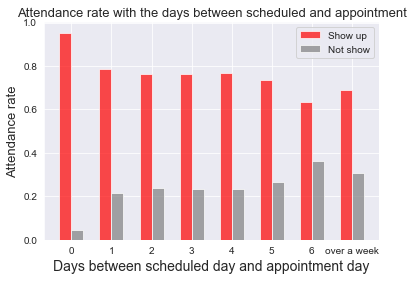

In [87]:
plt.bar(index, df_gap_proportion.loc['No'], width, color='r', alpha=0.7, label='Show up')
plt.bar(index+width, df_gap_proportion.loc['Yes'], width, color='grey', alpha=0.7, label='Not show')

plt.title('Attendance rate with the days between scheduled and appointment', fontsize=13)
plt.xlabel('Days between scheduled day and appointment day', fontsize = 14)
plt.ylabel('Attendance rate', fontsize = 13)
locations = index + width / 2
labels = ['0', '1', '2', '3', '4', '5', '6', 'over a week']
plt.xticks(locations, labels)

plt.legend()
df_gap_proportion

### Figure 2
Red bars show the percentage of attendance rate of each day.  
Grey bars show the percentage of absence rate of each day.

### Description
According to this figure, We can know that people schedule the very same day have the highest attendance rate. However, the no-show rate seems to have a positive correlation with days between scheduled day and appointment day.

### 3. Do the gender and age affect the attendance rate?

In [88]:
gender_total = df.groupby(['gender','no_show']).age.count()

In [89]:
df_female = gender_total['F'] / df.query('gender == "F"').age.count()
df_male = gender_total['M'] / df.query('gender == "M"').age.count()
df_female

no_show
No     0.796854
Yes    0.203146
Name: age, dtype: float64

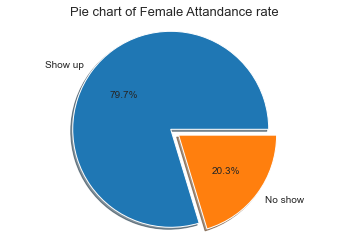

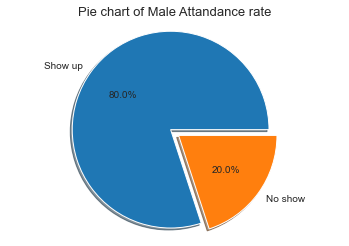

In [90]:
labels = 'Show up', 'No show'
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(df_female, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title('Pie chart of Female Attandance rate', fontsize=13)

fig1, ax2 = plt.subplots()
ax2.pie(df_male, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax2.axis('equal')
ax2.set_title('Pie chart of Male Attandance rate', fontsize=13)

plt.show()

### Figure 3
Blue area show the percentage of attendance rate of each gender.  
Orange area show the percentage of absence rate of each gender.

,mean,std
no_show,,
No,37.790064,23.338878
Yes,34.317667,21.965941


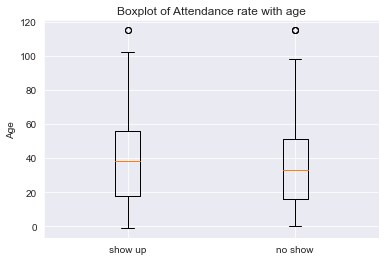

In [91]:
labels = 'show up', 'no show'
plt.boxplot([df_show.age,df_no_show.age], labels=labels)
plt.ylabel('Age')
plt.title('Boxplot of Attendance rate with age')
pd.DataFrame(df.groupby('no_show').age.describe().loc[:,['mean','std']])

### Figure 4
Boxplot of show up group and no-show group.

**Note**  
Observing these figures, it seems like the two group 'show-up' and 'no-show' that their age and gender don't have significant difference.

<a id='conclusions'></a>
## Conclusions
To sum up, four features are selected to discuss and here are the result.

> 1. SMS do not increase attendance rate, even decrease.
**Suggestion**: Adjust the content of sms or use a phone call instead of sms, and adjust sms sending time to the appointment day.  
>
>2. People whose scheduled day and appointment day are the same day have the highest attendance rate and the no-show rate seems to have a positive correlation with days between scheduled day and appointment day.   
**Suggestion**: Send everyone a sms at the appointment day. Remind them when do they head to medical occasion.  
>
>3. There are no obvious difference on Age and Gender distributions of show up and no-show groups.   
**Suggestion**: Maybe children can not go to medical occasion themselves, so this column is less meaning for attendance rate.

There are 110527 samples in this dataset, I think is enough to represent that region but not whole country. However, there are some shortcomings I would like to talk about.
>1. Some columns are quite useless such as neighbourhood. The scheduled medical occasions are not documented so we can't calculate the distance. I think maybe long distance between neighbourhood and medical occasion would affect attendance.
>2. An another limitation is we can not tell whether the person scheduled this appointment in person. If the other person help it, we can not ensure the information they input is right.
>3. For now, I don't kbow how to use more advanced statistic method such as two-sample test, anova test. Therefore, the statistic is not much professional. 

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295